Example (2 cell system)

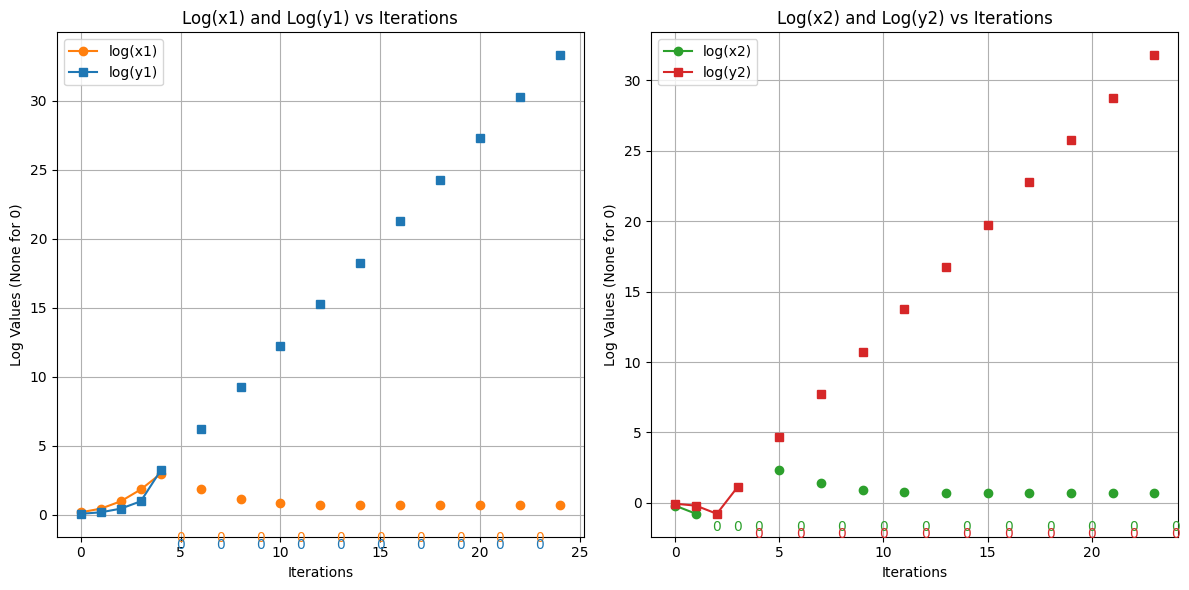

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initial values
x1, y1 = 1.06, 1.02
x2, y2 = 0.94, 0.98

# Lists to store values for plotting
x1_values, y1_values = [], []
x2_values, y2_values = [], []

# Number of iterations
iterations = 25

# Iterative computation
for i in range(iterations):
    tx1, tx2 = x1, x2
    ty1, ty2 = y1, y2

    rx1 = 5 * tx1 - 6 * ty1 + 1
    rx2 = 5 * tx2 - 6 * ty2 + 1
    dx = 0.5 * (tx2 - tx1)
    ry1 = 6 * tx1 - 7 * ty1 + 1
    ry2 = 6 * tx2 - 7 * ty2 + 1
    dy = 4.5 * (ty2 - ty1)

    x1 = max(0, (x1 + rx1 + dx))
    x2 = max(0, (x2 + rx2 - dx))
    y1 = max(0, (y1 + ry1 + dy))
    y2 = max(0, (y2 + ry2 - dy))

    # Append values for plotting
    x1_values.append(x1)
    y1_values.append(y1)
    x2_values.append(x2)
    y2_values.append(y2)

# Handle log values and zero logging
def safe_log(values):
    """Apply log transformation with custom handling of zeros."""
    return [np.log(v) if v > 0 else None for v in values]

# Apply safe log transformation
x1_logs = safe_log(x1_values)
y1_logs = safe_log(y1_values)
x2_logs = safe_log(x2_values)
y2_logs = safe_log(y2_values)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for x1 and y1
plt.subplot(1, 2, 1)
x1_line, = plt.plot(range(iterations), x1_logs, label="log(x1)", marker='o', color='tab:orange')
y1_line, = plt.plot(range(iterations), y1_logs, label="log(y1)", marker='s', color='tab:blue')
plt.title("Log(x1) and Log(y1) vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Log Values (None for 0)")
plt.legend()
plt.grid(True)

# Annotate zeros for x1 and y1
for i, (x, y) in enumerate(zip(x1_logs, y1_logs)):
    if x is None:
        plt.annotate("0", (i, -1), textcoords="offset points", xytext=(0, -10), ha='center', color=x1_line.get_color())
    if y is None:
        plt.annotate("0", (i, -1.5), textcoords="offset points", xytext=(0, -10), ha='center', color=y1_line.get_color())

# Plot for x2 and y2
plt.subplot(1, 2, 2)
x2_line, = plt.plot(range(iterations), x2_logs, label="log(x2)", marker='o', color='tab:green')
y2_line, = plt.plot(range(iterations), y2_logs, label="log(y2)", marker='s', color='tab:red')
plt.title("Log(x2) and Log(y2) vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Log Values (None for 0)")
plt.legend()
plt.grid(True)

# Annotate zeros for x2 and y2
for i, (x, y) in enumerate(zip(x2_logs, y2_logs)):
    if x is None:
        plt.annotate("0", (i, -1), textcoords="offset points", xytext=(0, -10), ha='center', color=x2_line.get_color())
    if y is None:
        plt.annotate("0", (i, -1.5), textcoords="offset points", xytext=(0, -10), ha='center', color=y2_line.get_color())

plt.tight_layout()
plt.show()


Continuous ring of tissue

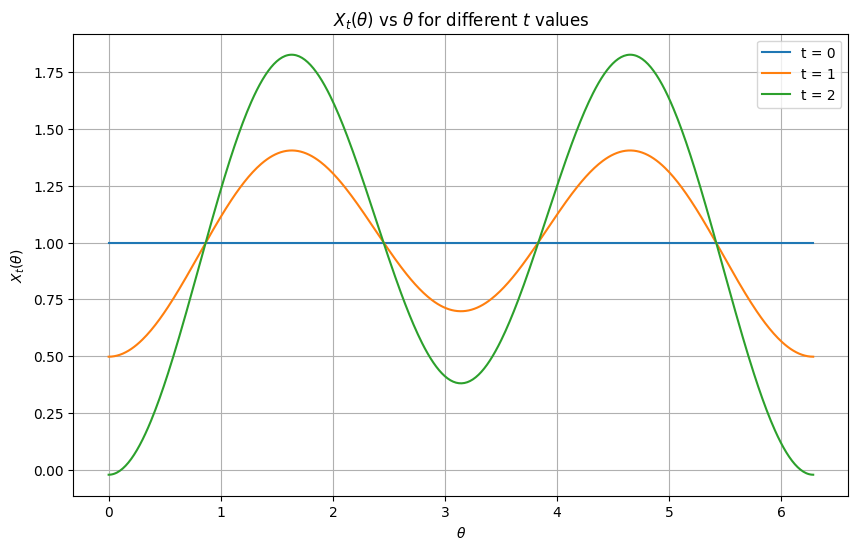

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 1
k = 2
s_values = np.arange(-2, 3)  # Summation limits: s = -2 to 2
p_s = -0.1 * s_values        # p_s = -0.1 * s
p_s_prime = 0.1 * s_values   # p_s' = 0.1 * s
A_s = s_values               # A_s = s
B_s = 0.5 * s_values         # B_s = 0.5 * s

# Range for theta
theta = np.linspace(0, 2 * np.pi, 500)

# Time values
t_values = [0, 1, 2]

# Compute X_t(theta) for different t values and plot
plt.figure(figsize=(10, 6))
for t in t_values:
    X_t = h + np.sum(
        [(A_s[s] * np.exp(p_s[s] * t) + B_s[s] * np.exp(p_s_prime[s] * t)) * np.exp(1j * s_values[s] * theta)
         for s in range(len(s_values))], axis=0
    ).real
    plt.plot(theta, X_t, label=f"t = {t}")

# Customize plot
plt.title(r"$X_t(\theta)$ vs $\theta$ for different $t$ values")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$X_t(\theta)$")
plt.legend()
plt.grid()
plt.show()


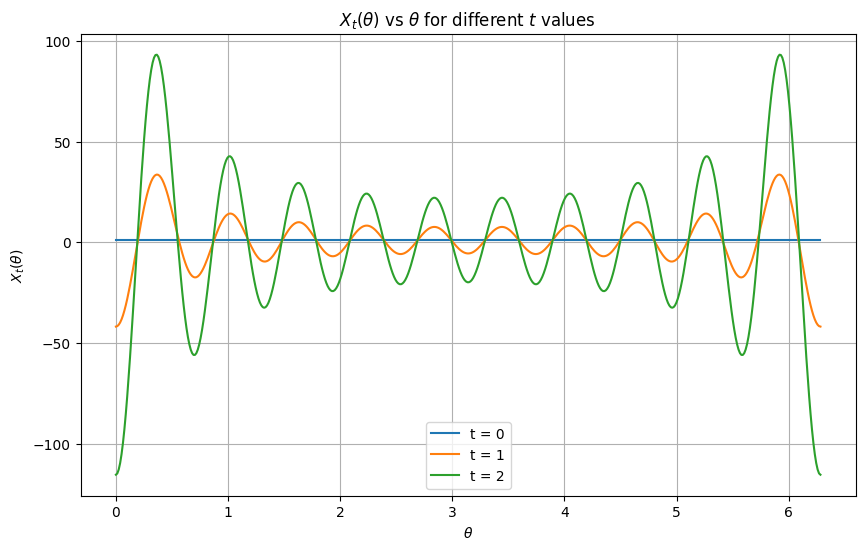

In [ ]:
# Update summation limits: s = -10 to 10
s_values = np.arange(-10, 11)
p_s = -0.1 * s_values
p_s_prime = 0.1 * s_values
A_s = s_values
B_s = 0.5 * s_values

# Compute X_t(theta) for new s limits and plot
plt.figure(figsize=(10, 6))
for t in t_values:
    X_t = h + np.sum(
        [(A_s[s] * np.exp(p_s[s] * t) + B_s[s] * np.exp(p_s_prime[s] * t)) * np.exp(1j * s_values[s] * theta)
         for s in range(len(s_values))], axis=0
    ).real
    plt.plot(theta, X_t, label=f"t = {t}")

# Customize plot
plt.title(r"$X_t(\theta)$ vs $\theta$ for different $t$ values ")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$X_t(\theta)$")
plt.legend()
plt.grid()
plt.show()


Numerical example

<ipython-input-6-eaf77059ab2a>:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  wedge = plt.Polygon([


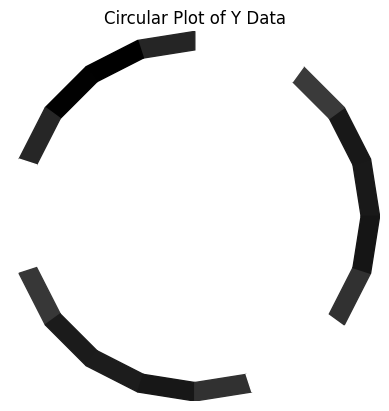

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracted data from the image
data = np.array([1.463, 1.469, 1.255, 0.000, 0.000, 1.385, 1.622, 1.615, 1.382, 0.000,
                 0.000, 1.273, 1.451, 1.442, 1.478, 1.308, 0.000, 0.000, 1.309, 1.487])

# Define the circle plot function
def plot_Y(data, title):
    # Normalize the data (0-1 scale)
    norm_data = (data - np.min(data)) / (np.max(data) - np.min(data))

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Parameters
    radius_outer = 1.0
    radius_inner = 0.9  # Thin ring width
    angles = np.linspace(0, 2 * np.pi, len(data) + 1)  # Divide the circle into 20 parts

    # Plot each segment of the periphery
    for i in range(len(data)):
        theta1, theta2 = angles[i], angles[i + 1]
        color = str(1 - norm_data[i])  # Shade based on normalized value

        # Draw the outer segment (arc)
        wedge = plt.Polygon([
            [radius_inner * np.cos(theta1), radius_inner * np.sin(theta1)],
            [radius_outer * np.cos(theta1), radius_outer * np.sin(theta1)],
            [radius_outer * np.cos(theta2), radius_outer * np.sin(theta2)],
            [radius_inner * np.cos(theta2), radius_inner * np.sin(theta2)],
        ], color=color, edgecolor='black')

        ax.add_patch(wedge)

    # Set limits and hide axes
    ax.set_xlim(-radius_outer, radius_outer)
    ax.set_ylim(-radius_outer, radius_outer)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.set_title(title)
    plt.show()

# Plot the data with the circle plot function
plot_Y(data, "Circular Plot of Y Data")


<ipython-input-6-eaf77059ab2a>:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  wedge = plt.Polygon([


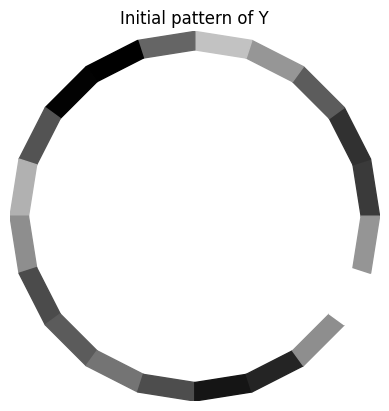

In [ ]:
Y_initial = [0.929, 0.940, 0.885, 0.810, 0.753, 0.873, 1.003, 1.000, 0.896, 0.775, 0.820, 0.907, 0.886, 0.854, 0.904, 0.976, 0.957, 0.820, 0.675, 0.811]
plot_Y(Y_initial,"Initial pattern of Y")

In [ ]:
# Turing's Code

import numpy as np;
cell = np.zeros((20,2)); # original cell values
temp = np.zeros((20,2)); # temp storage after update.
cell[:,0] = np.array([1.130, 1.123, 1.154, 1.215, 1.249, 1.158, 1.074, 1.078, 1.148, 1.231, 1.204, 1.149, 1.156, 1.170, 1.131, 1.090, 1.109, 1.201, 1.306, 1.217]) # Values from Turing
cell[:,1] = np.array([0.929, 0.940, 0.885, 0.810, 0.753, 0.873, 1.003, 1.000, 0.896, 0.775, 0.820, 0.907, 0.886, 0.854, 0.904, 0.976, 0.957, 0.820, 0.675, 0.811]) # Values from Turing

gm = -0.25; #initial gamma value
Bflag = 0;
cnt=0;
jitter_x = np.zeros(21);
jitter_y = np.zeros(21);
stdev = 0.004;

while ((gm <= 0.0)*(cnt >= 100) == False):
  #let us capture the diffusion uncertainty.
  for i in range(0,20):
    x  = 1.0*cell[i][0] ; y = 1.0*cell[i][1];      # current cell
    xl = 1.0*cell[i-1][0] ; yl = 1.0*cell[i-1][1]; # left cell
    xr = 1.0*cell[(i+1)%20][0] ; yr = 1.0*cell[(i+1)%20][1]; # right cell

    xrate = 1/16;

    if(i == 0):
        jitter_x[0] = np.random.normal(0,stdev*(((x+xl)*0.23)**0.5));
        jitter_y[0] = np.random.normal(0,stdev*(((y+yl)*0.12)**0.5));

    jitter_x[i+1] = np.random.normal(0,stdev*(((x+xr)*0.23)**0.5));
    jitter_y[i+1] = np.random.normal(0,stdev*(((y+yr)*0.12)**0.5));

    xd = 0.23*(xr - x) + 0.23*(xl - x); yd = 0.12*(yr - y) + 0.12*(yl - y); # appropriate diffusion from neighbours.
    xd = xd - jitter_x[i] + jitter_x[(i+1)%20]; #the last randomness in the array is neglected
    yd = yd - jitter_y[i] + jitter_y[(i+1)%20];  #the last randomness in the array is neglected

    augval = (1/32)*(50*x*y + 7*x*x - 55*(1+gm)); # within cell reaction augment.
    tval = np.random.normal(0,stdev*((np.abs(augval))**0.5)); #uncertainty in reaction
    augval = augval + tval;

    temp[i][1] = 1.0*y + augval - y/16 + yd; # updated y value.
    temp[i][0] = 1.0*x - augval + xrate + xd;

    if(temp[i][0] < 0):
      temp[i][0] = 0;       # avoid negative values of x.
      temp[i][1] = np.max((0, y + (xd + xrate + x) - y/16 + yd));  # choose the right amount.

    if(temp[i][1] < 0):
      temp[i][1] = 0;       # avoid negative values of y.
      temp[i][0] = np.max((0, 1.0*x + y + yd - y/16 + xrate + xd));


  #temp = np.round(temp,5)
  cell = 1.0*temp #+ np.random.normal(0,0.001,(20,2));

  if(gm >= 1/16): #check for forward run
    Bflag=1; #backward run should start now.

  if ((gm == 0)*(Bflag == 1) == False):
    gm += ((1.0-2.0*Bflag)/128)

  cnt += Bflag


#  if(Bflag):
#    gm -= 1.0/128;
#  else:
#    gm += 1.0/128;

print(cell)


[[1.71859259 0.        ]
 [1.39875982 0.93449718]
 [0.46739074 1.59485056]
 [1.41897215 0.91331754]
 [1.69030591 0.        ]
 [1.12852131 1.13070122]
 [0.69852898 1.3545029 ]
 [0.941315   1.07747698]
 [0.99288779 1.1109871 ]
 [0.69240189 1.48818098]
 [1.811978   0.        ]
 [0.52454079 1.63982078]
 [1.54259614 0.7829357 ]
 [0.51599992 1.65018927]
 [1.81966168 0.        ]
 [0.60331829 1.54960306]
 [1.2541601  0.93509948]
 [0.73818864 1.20968213]
 [1.15457942 1.00870399]
 [0.67920979 1.50896359]]


<ipython-input-6-eaf77059ab2a>:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  wedge = plt.Polygon([


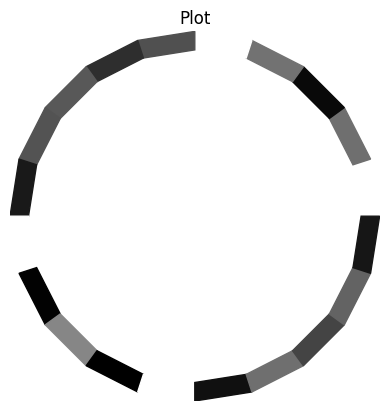

In [ ]:
plot_Y(cell[:,1],"Plot")

Chemical waves

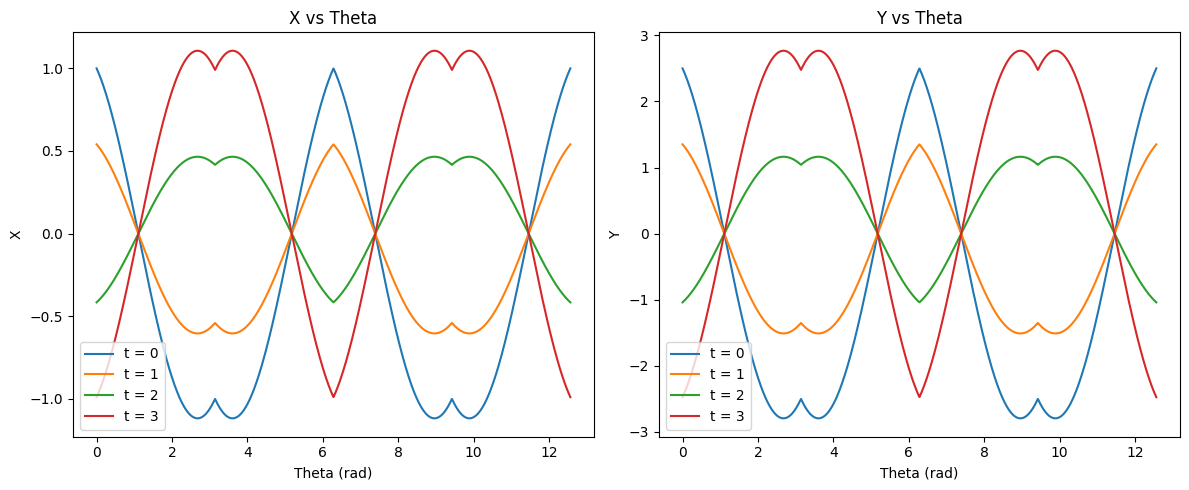

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lpmv  # Associated Legendre polynomial

# Constants and parameters
n0 = 1  # n0 is 1 as given
phi = 0  # Simplification assumption
h = 0  # Offset for X
k = 0  # Offset for Y
b = 1  # Arbitrary scaling factor
a = 0.5  # Arbitrary constant
mu_prime = 1  # Arbitrary constant
rho = 1  # Arbitrary constant
q_n0 = 1  # Arbitrary frequency term
A_n0_m = {m: 1 for m in range(-n0, n0 + 1)}  # Coefficients set to 1

# Function for X(theta, t)
def compute_X(theta, t):
    summation = sum(
        A_n0_m[m] * lpmv(m, n0, np.cos(theta)) * np.exp(1j * m * phi)
        for m in range(-n0, n0 + 1)
    )
    return np.real(np.exp(1j * q_n0 * t) * summation + h)

# Function for Y(theta, t)
def compute_Y(X_val):
    coefficient = q_n0 - a + (mu_prime / rho**2) * n0 * (n0 + 1)
    return k + coefficient * X_val / b

# Theta values
theta_vals = np.linspace(0, 4*np.pi, 2000)

# Time values for plotting
time_vals = [0, 1, 2,3]  # Example time points

# Compute X and Y for each time value
results = []
for t in time_vals:
    X_vals = compute_X(theta_vals, t)
    Y_vals = compute_Y(X_vals)
    results.append((X_vals, Y_vals))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, t in enumerate(time_vals):
    axes[0].plot(theta_vals, results[i][0], label=f"t = {t}")
    axes[1].plot(theta_vals, results[i][1], label=f"t = {t}")

# X vs theta
axes[0].set_title("X vs Theta")
axes[0].set_xlabel("Theta (rad)")
axes[0].set_ylabel("X")
axes[0].legend()

# Y vs theta
axes[1].set_title("Y vs Theta")
axes[1].set_xlabel("Theta (rad)")
axes[1].set_ylabel("Y")
axes[1].legend()

plt.tight_layout()
plt.show()
